<a href="https://colab.research.google.com/github/bonareri/Bitcoin-Prediction-Analysis/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin Price Prediction and Risk Analysis

## 1. Install Necessary Libraries


In [1]:
!pip install yfinance

In [2]:
!pip install pandas numpy matplotlib statsmodels

In [38]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.0 MB/s eta 0:00:00


## 2: Import Libraries and Load Data

In [16]:
# importing libraries
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

#For modelling
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [5]:
df

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...
2025-01-26,102682.500000,105438.648438,102507.710938,104713.210938,22543395879
2025-01-27,102087.687500,103214.109375,97795.937500,102680.304688,89006608428


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3789 entries, 2014-09-17 to 2025-01-30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3789 non-null   float64
 1   (High, BTC-USD)    3789 non-null   float64
 2   (Low, BTC-USD)     3789 non-null   float64
 3   (Open, BTC-USD)    3789 non-null   float64
 4   (Volume, BTC-USD)  3789 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.6 KB


In [7]:
# Rename columns to remove the repetition of 'BTC-USD'
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [8]:
df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-26,102682.500000,105438.648438,102507.710938,104713.210938,22543395879
2025-01-27,102087.687500,103214.109375,97795.937500,102680.304688,89006608428
2025-01-28,101332.476562,103730.820312,100238.187500,102095.414062,47180685494
2025-01-29,103703.210938,104750.804688,101283.820312,101317.523438,47432049818
2025-01-30,105051.554688,105562.601562,103460.500000,103718.054688,52169826304


## Data Cleaning

In [9]:
#convert the index column to datetime
df.index = pd.to_datetime(df.index)

In [10]:
# Extract the 'Close' price for ARIMA/SARIMA modeling
series = df['Close']

In [11]:
series.describe()

,Close
count,3789.000000
mean,20221.939963
std,23163.409004
min,178.102997
25%,1255.150024
50%,9439.124023
75%,31971.914062
max,106146.265625


## 3: Visualizing the Data

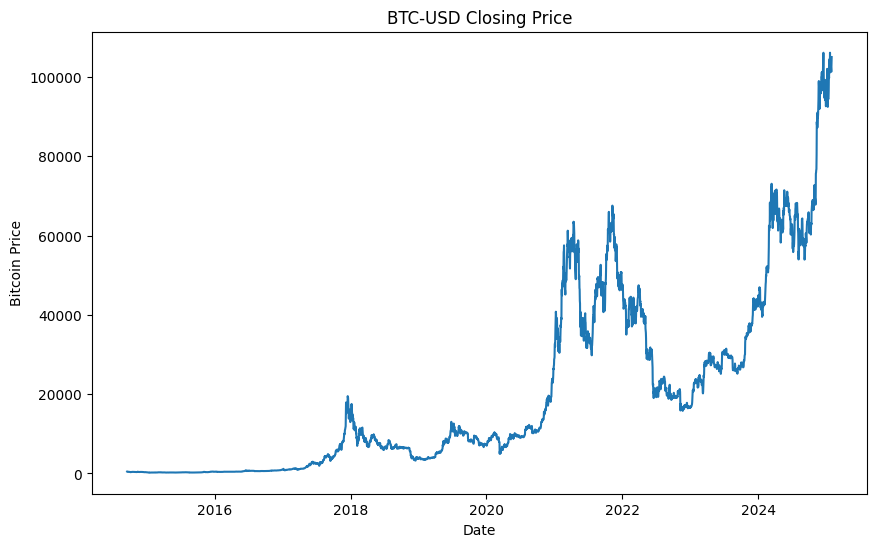

In [13]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(series)
plt.title('BTC-USD Closing Price')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.show()

### Insights of Bitcoin Closing Price Time Series

- **Trend**:  
  The time series shows a **clear upward trend** in Bitcoin closing prices, particularly from 2017 to 2024. The price increases exponentially, with significant price surges observed in 2017, and again in the 2020–2024 period.

- **Volatility**:  
  There is notable **volatility** throughout the series, with rapid fluctuations in the price, especially in 2017–2018 and from 2020 onward. This suggests high market speculation and sensitivity to external factors.

- **Seasonality**:  
  It is not immediately clear from the chart whether there is strong **seasonality**. The price changes do not follow a predictable, recurring pattern at regular intervals, which is typical of seasonality. The observed behavior seems more driven by market dynamics than by a periodic, seasonal effect.

### Further Analysis:
- **Trend Decomposition**:  
  **Decomposition** to break down the time series into trend, seasonal, and residual components for clearer insights.

- **ACF/PACF**:  
  **Autocorrelation and Partial Autocorrelation plots** to detect periodicity and seasonal patterns in the data.

## 4: Check for Stationarity



### 1. Rolling statistics

Visualize trends and fluctuations over time. If the time series is stationary, the rolling mean and standard deviation should remain relatively constant.

In [14]:
#Determine rolling statistics
rolling_mean = series.rolling(window=12).mean()
rolling_std = series.rolling(window=12).std()

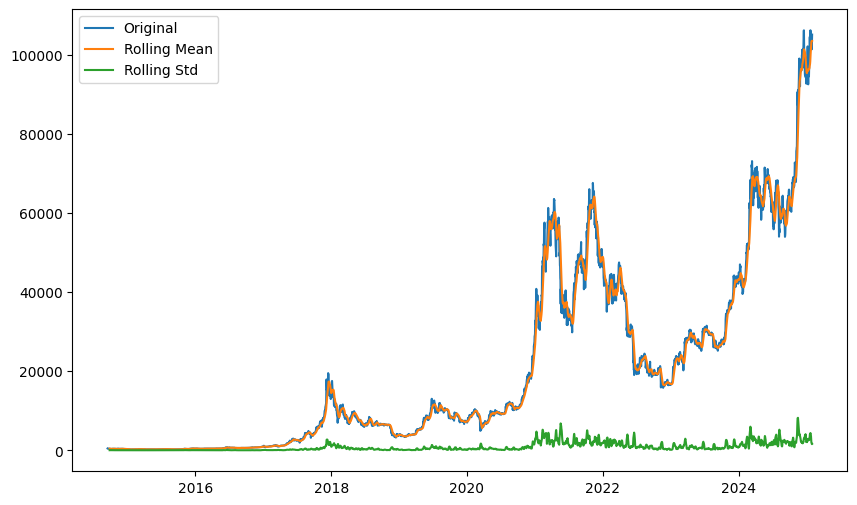

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(series, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')

 Rolling mean is not constant while the rolling standard deviation is constant, thus the time series is non-stationary. This indicates that the series has a trend but no significant change in variance over time.

### 2. Augmented Dickey-Fuller (ADF) test

In [ ]:
result = adfuller(series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.7078322432424775
p-value: 0.9899928862633942


In [ ]:
# Interpretation
adf_statistics = result[0]
p_value = result[1]

if p_value < 0.5:
    print("The time series is stationary (reject null Hypothesis)")

else:
    print("the time seris is not stationary (Fail to reject the null hypothsis)")

the time seris is not stationary (Fail to reject the null hypothsis)


## Decomposition

Splits a time series into:

- Trend → Long-term upward or downward movement.
- Seasonality → Repeating patterns at regular intervals.
- Residual (Noise) → Irregular, unpredictable variations.

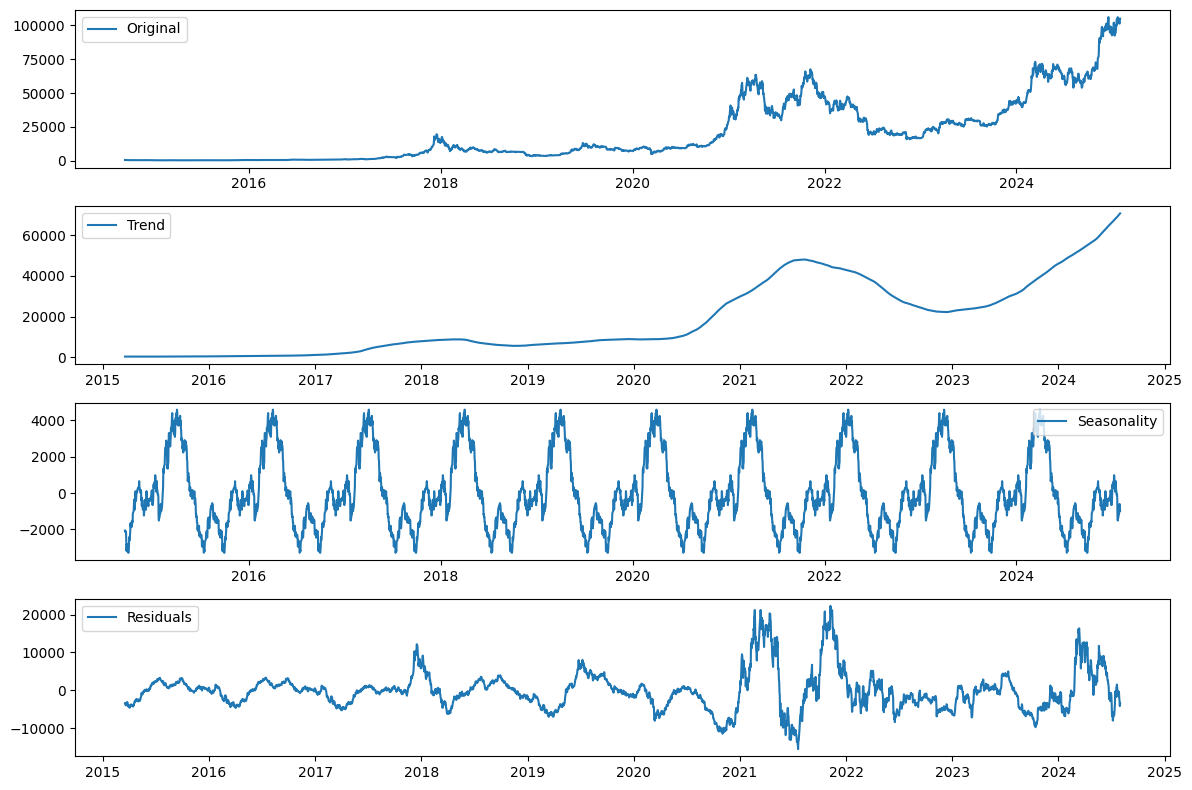

In [18]:
# Additive decomposition
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)  # Adjust period based on data frequency

# Plot decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

## 5: Make the Series Stationary

###  Apply First-Order Differencing

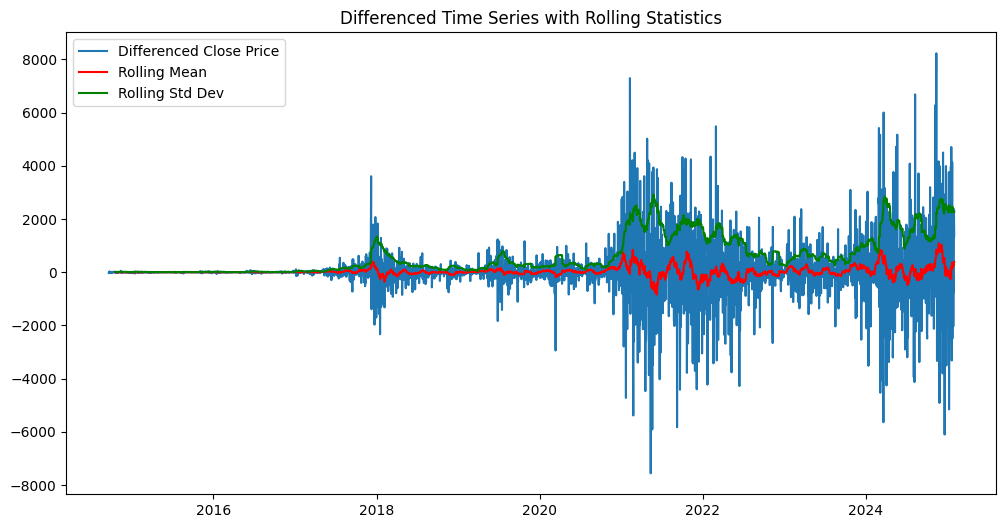

In [20]:
# First-order differencing
df['Close_diff'] = df['Close'].diff()

# Drop the first row since differencing creates NaN
df.dropna(inplace=True)

# Compute rolling statistics
rolling_mean = df['Close_diff'].rolling(window=30).mean()
rolling_std = df['Close_diff'].rolling(window=30).std()

# Plot the differenced series and rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(df['Close_diff'], label='Differenced Close Price')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.legend()
plt.title('Differenced Time Series with Rolling Statistics')
plt.show()


## 6: Identify ARIMA Parameters (p, d, q)

- Plot ACF and PACF to find the values of p and q.

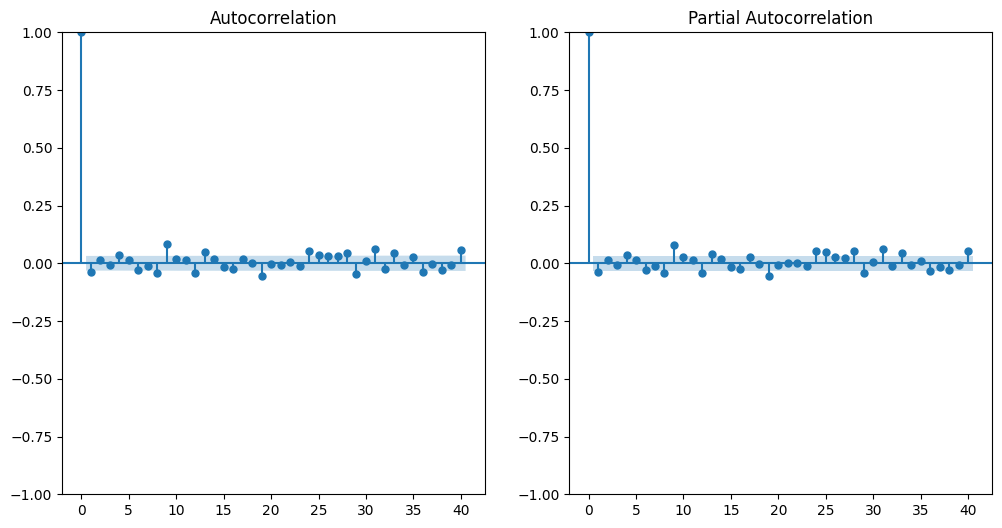

In [ ]:
# ACF and PACF plots for ARIMA
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_series, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(diff_series, lags=40, ax=plt.gca())
plt.show()

## Modelling

### Train-Test Split

In [27]:
# Define split point (80% train, 20% test)
split = int(len(df) * 0.8)

# Training set
train = df.iloc[:split]
# Test set (the most recent 20% of data)
test = df.iloc[split:]

print(f"Training Set: {train.shape}, Test Set: {test.shape}")

Training Set: (3029, 6), Test Set: (758, 6)


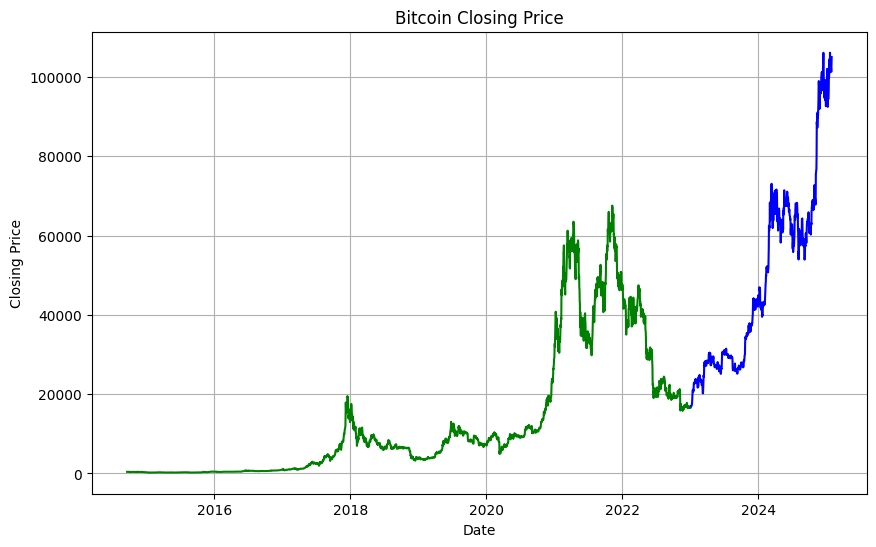

In [28]:
#split data into train and test set
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Bitcoin Closing Price')
plt.plot(df[0:to_row]['Close'], 'green',  label='Training Data')
plt.plot(df[to_row:]['Close'], 'blue', label='Testing Data')

### Train ARIMA on the Training Set

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model (p, d, q need to be determined)
p, d, q = 1, 1, 1  # Adjust these values based on ACF/PACF analysis

# Fit ARIMA model on training data
model = ARIMA(train['Close'], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3029
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -24517.231
Date:                Thu, 30 Jan 2025   AIC                          49040.462
Time:                        14:00:08   BIC                          49058.509
Sample:                    09-19-2014   HQIC                         49046.950
                         - 01-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0674      0.352     -0.191      0.848      -0.757       0.622
ma.L1          0.0418      0.353      0.118      0.906      -0.650       0.733
sigma2      6.323e+05   5350.176    118.184      0.0

### Forecast on the Test Set

In [33]:
# Forecast for the test set
forecast = model_fit.forecast(steps=len(test))

# Convert forecast to DataFrame for easier plotting
test['Forecast_ARIMA'] = forecast.values

<ipython-input-33-a005b193d894>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast_ARIMA'] = forecast.values


## Plot Actual vs Predicted Values

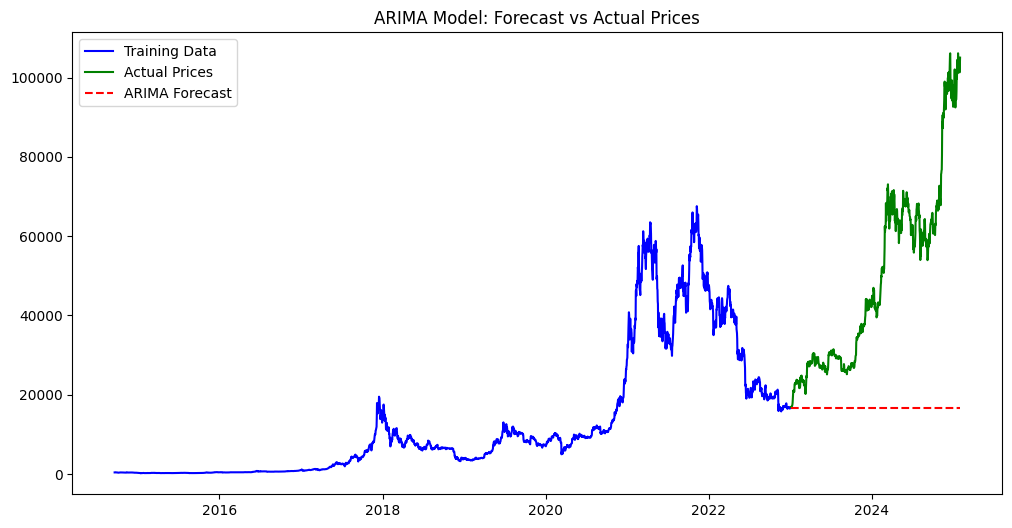

In [34]:
import matplotlib.pyplot as plt

# Plot the training data, test data, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Training Data', color='blue')
plt.plot(test.index, test['Close'], label='Actual Prices', color='green')
plt.plot(test.index, test['Forecast_ARIMA'], label='ARIMA Forecast', color='red', linestyle='dashed')
plt.legend()
plt.title("ARIMA Model: Forecast vs Actual Prices")
plt.show()

### Evaluate Model Performance

In [36]:
# Calculate error metrics
mae = mean_absolute_error(test['Close'], test['Forecast_ARIMA'])
mse = mean_squared_error(test['Close'], test['Forecast_ARIMA'])
rmse = mse ** 0.5

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 32956.1040563
Root Mean Squared Error (RMSE): 40492.51012813142


## Hyperparameter Tuning

Auto-ARIMA for Optimal (p, d, q)

In [39]:
from pmdarima import auto_arima

# Auto-ARIMA for best (p, d, q)
auto_model = auto_arima(train['Close'],
                        seasonal=False,  # No seasonality for standard ARIMA
                        stepwise=True,
                        trace=True)  # Show progress

# Best parameters
print(auto_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=49018.618, Time=7.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=49040.312, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=49040.329, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=49040.350, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=49038.451, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=49042.692, Time=1.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=49044.285, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=49022.846, Time=9.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=49022.906, Time=7.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=49042.317, Time=1.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=49042.962, Time=2.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=49043.176, Time=1.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=49024.553, Time=7.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=49019.004, Time=5.12 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 45.428 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3029
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -24503.309
Date:                Thu, 30 Jan 2025   AIC                          49018.618
Time:                        14:07:24   BIC                          49054.712
Sample:                    09-19-2014   HQIC                         49031.595
                         - 01-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.2802     15.103      0.283      0.777     -25.32

### Train ARIMA Using Best Parameters

In [40]:
# Extract best p, d, q
best_p, best_d, best_q = auto_model.order

# Train ARIMA with best parameters
best_arima = ARIMA(train['Close'], order=(best_p, best_d, best_q))
best_arima_fit = best_arima.fit()

# Print model summary
print(best_arima_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3029
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -24504.502
Date:                Thu, 30 Jan 2025   AIC                          49019.004
Time:                        14:09:11   BIC                          49049.083
Sample:                    09-19-2014   HQIC                         49029.818
                         - 01-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8179      0.009     86.159      0.000       0.799       0.836
ar.L2         -0.9483      0.009   -106.853      0.000      -0.966      -0.931
ma.L1         -0.8481      0.009    -92.210      0.0

### Forecast with Optimized ARIMA

<ipython-input-41-8f01bfb21ec0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast_ARIMA'] = best_arima_fit.forecast(steps=len(test))


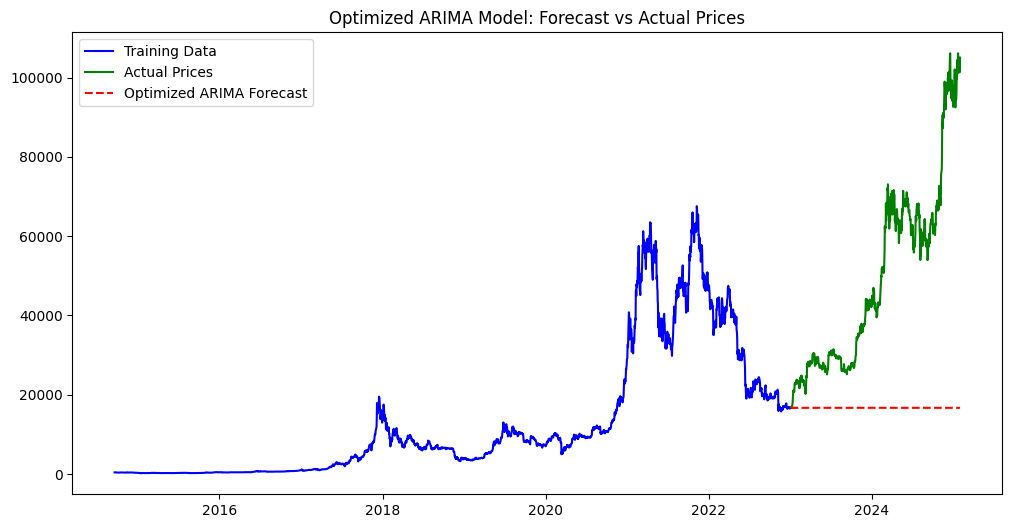

In [41]:
# Forecast
test['Forecast_ARIMA'] = best_arima_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Training Data', color='blue')
plt.plot(test.index, test['Close'], label='Actual Prices', color='green')
plt.plot(test.index, test['Forecast_ARIMA'], label='Optimized ARIMA Forecast', color='red', linestyle='dashed')
plt.legend()
plt.title("Optimized ARIMA Model: Forecast vs Actual Prices")
plt.show()

In [42]:
# Calculate performance metrics
mae = mean_absolute_error(test['Close'], test['Forecast_ARIMA'])
mse = mean_squared_error(test['Close'], test['Forecast_ARIMA'])
rmse = mse ** 0.5

print(f"Optimized ARIMA Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Optimized ARIMA Model Performance:
Mean Absolute Error (MAE): 32942.72825603061
Root Mean Squared Error (RMSE): 40481.670564869746
